## What You'll Accomplish in this Notebook

Here's what you'll do in this notebook:
<ul>
    <li>learn about the need for relational databases, and what they are with a youtube video</li>
    <li>see how we might construct our own database using python</li>
    <li>see how we can get data from a database using python</li>
    <li>practice running sql queries with python</li>
    <li>learn some basic SQL queries</li>
</ul>

In [1]:
import pandas as pd

# Python and Interacting with Databases

Many of your at home projects can probably be accomplished with one or two data files in csv, json, or table format. However, if you go to work in industry, your company may store its data in some sort of <i>relational database</i>. You may have heard terms like `SQL` server before. Before we get into specifics let's watch this 5 minute tutorial video on what a database is, and why we might like to use one.
<br>
<br>
<a href="https://www.youtube.com/watch?v=wR0jg0eQsZA">https://www.youtube.com/watch?v=wR0jg0eQsZA</a>
<br>
<br>
As the video says databases are ubiquitous in industry, so knowing how to handle them is important. If you're serious you could learn how to program directly in `SQL`,  <i>the Structured Query Language</i>. This is the standard language for relational databases. `SQL` is how you can talk to a database and find the data you need. 

Since the focus of our course is `python` we're lucky that python offers a couple of ways to interact with databases both in the base python packages with `sqlite3` (`python`'s built in SQLite driver), and with an additional package `sqlalchemy` (the `python` `SQL` toolkit and Object Relational Mapper that gives application developers the full power and flexibility of `SQL`). If you installed python via the anacondas distribution you should have `sqlalchemy` installed. If not you'll need to install it before we the end of the notebook. 

In [2]:
## Run this block of code to check that you have 
## the required packages installed.
import sqlite3
import sqlalchemy

We'll first focus on `sqlite3` then end with a little work in `sqlalchemy`. `sqlite3` is a `C` library built into base `python` that allows for `python` to execute `SQLite` processes. All you'll need to know is that `SQLite` is essentially the Diet Coke to `SQL`'s Coca-Cola. To learn more about the differences check out this webpage <a href="https://www.milesweb.com/hosting-faqs/sqlite-vs-mysql/">https://www.milesweb.com/hosting-faqs/sqlite-vs-mysql/</a>.

### Constructing a Database

To better understand the structure of a relational database we'll first construct one. Let's just take the example from the video. I'm running a cat store, I sell 3 products: cat food, cat treats, and cat toys. I want a database to keep track of who is buying what stuff from me.

Let's go through the process step by step.

#### Create the Connection

In [3]:
# The first step is creating a connection to the database
# This creates the connection and the database if it didn't
# already exist
conn = sqlite3.connect("cat_store.db")

# Now you can check the directory in your computer where
# you store this notebook. You should now see catstore.db
# in there.

#### Create a Cursor Object

In [4]:
# Step 2 is to create a cursor object
# this allows us to execute SQL code chunks
# written as python strings


c = conn.cursor()

#### Executing SQL Code

We'll now go over some basic SQL code.

##### Creating a Table

The first SQL we'll do is create a table, because our database is currently empty.

In [5]:
# SQL code is written as python strings
# then placed inside cursor.execute()


# CREATE TABLE is SQL code
# it creates a table with the given name, here products
# in parantheses we list the columns of our table
# along with the SQL data type
# The PRIMARY KEY line sets the product_id as the
# primary key for this table
c.execute("""CREATE TABLE products(
                    product_id int,
                    product text,
                    price real,
                    in_stock int,
                    PRIMARY KEY (product_id)
                )""")

# Now in order to commit the action to your database
# you run connection.commit().
conn.commit()

# Note only run this block ONCE EVER
# Running it multiple times will cause an error
# This is because we can't create a table that already exists 
# in the database

OperationalError: table products already exists

##### Entering an Entry in a Table

The next SQL we'll see is how to insert an entry into our table.

In [6]:
# INSERT INTO is the SQL code 
# it will insert whatever VALUES follows 
# into the specified table
# we'll add the cat food as product 1
# its 12.50 and we have 10 bags
c.execute("INSERT INTO products VALUES (1,'Cat Food',12.50,10)")

# Again commit this to the database.
conn.commit()

# DON'T Run this more than once.

IntegrityError: UNIQUE constraint failed: products.product_id

##### Retrieving Data From a Table

Now that there is data in our table we can retrieve it.

In [7]:
# SELECT * FROM is SQL code
# it will find all entries in the specified table
c.execute("SELECT * FROM products")

# We've now selected all data from products
# We can display them with the cursor.fetchall() method
print(c.fetchall())

# Feel free to run this block as much as you want.

[(1, 'Cat Food', 12.5, 10), (2, 'Cat Treats', 5.25, 20), (3, 'Cat Toy', 2.5, 30)]


In [8]:
# Run this block to add the final two products
c.execute("INSERT INTO products VALUES (2,'Cat Treats',5.25,20)")
c.execute("INSERT INTO products VALUES (3,'Cat Toy',2.50,30)")

conn.commit()

# Only Run ONCE

IntegrityError: UNIQUE constraint failed: products.product_id

In [9]:
# Now we can see all three products
c.execute("SELECT * FROM products")

# We've now selected all data from products
# We can display them with the cursor.fetchall() method
print(c.fetchall())

# Feel free to run this block as much as you want.

[(1, 'Cat Food', 12.5, 10), (2, 'Cat Treats', 5.25, 20), (3, 'Cat Toy', 2.5, 30)]


##### Getting Data With Logic Conditions

The final thing we'll go over before you build a table is how to select all entries from a table that meet a certain condition.

In [10]:
# When we use SELECT * FROM table_name
# We add a WHERE statement followed by a conditional
# let's find all the entries that cost more than $5
c.execute("SELECT * FROM products WHERE price > 5")

print(c.fetchall())

[(1, 'Cat Food', 12.5, 10), (2, 'Cat Treats', 5.25, 20)]


In [11]:
# In addition to fetchall() there is: 
# fetchone() - this reads the data you've queried one at a time, and
# fetchmany(n) - this reads the data in n sized chunks at a time

#### Practice

Now it's your turn to make a table!

Since our cat store has opened we've had five customers. It would be good for us to keep track of them so we can provide them coupons in the future.

Each unique customer should have a:
<ol>
    <li>Customer ID</li>
    <li>First Name</li>
    <li>Last Name</li>
    <li>email address</li>
    <li>number of cats they own</li>
</ol>

The Customer ID should be the primary key for the table.

It's up to you to come up with the names of the customers, just be sure that each unique customer has a unique customer id, and be sure your code is correct before running. You don't want to accidentally enter the same customer twice!

In [12]:
## Code here
conn_customer = sqlite3.connect("cat_store_customer.db")
c_costumer = conn_customer.cursor()

c_costumer.execute("""CREATE TABLE customer(
                    customer_id int,
                    FirstName text,
                    LastName text,
                    email text,
                    catNumber int,
                    PRIMARY KEY (customer_id)
                )""")

# Now in order to commit the action to your database
# you run connection.commit().
conn_customer.commit()





OperationalError: table customer already exists

In [13]:
## Code here
c_costumer.execute("INSERT INTO customer VALUES (0,'John','Smith','john.smoth@gmail.com',1)")
conn_customer.commit()









IntegrityError: UNIQUE constraint failed: customer.customer_id

In [14]:
## Code here
c_costumer.execute("SELECT * FROM customer")

# We've now selected all data from products
# We can display them with the cursor.fetchall() method
print(c_costumer.fetchall())








[(0, 'John', 'Smith', 'john.smoth@gmail.com', 1), (1, 'John1', 'Smith1', 'john.smith1@gmail.com', 1), (2, 'John2', 'Smith2', 'john.smith2@gmail.com', 2), (3, 'John3', 'Smith3', 'john.smith3@gmail.com', 3), (4, 'John4', 'Smith4', 'john.smith4@gmail.com', 4)]


In [15]:
## Code here
c_costumer.execute("INSERT INTO customer VALUES (1,'John1','Smith1','john.smith1@gmail.com',1)")
c_costumer.execute("INSERT INTO customer VALUES (2,'John2','Smith2','john.smith2@gmail.com',2)")
c_costumer.execute("INSERT INTO customer VALUES (3,'John3','Smith3','john.smith3@gmail.com',3)")
c_costumer.execute("INSERT INTO customer VALUES (4,'John4','Smith4','john.smith4@gmail.com',4)")
conn_customer.commit()








IntegrityError: UNIQUE constraint failed: customer.customer_id

Now print out a list of all our customers. Then print out a list of the customers that have more than 2 cats.

In [16]:
## Code here
## Code here
c_costumer.execute("SELECT * FROM customer")

# We've now selected all data from products
# We can display them with the cursor.fetchall() method
print(c_costumer.fetchall())










[(0, 'John', 'Smith', 'john.smoth@gmail.com', 1), (1, 'John1', 'Smith1', 'john.smith1@gmail.com', 1), (2, 'John2', 'Smith2', 'john.smith2@gmail.com', 2), (3, 'John3', 'Smith3', 'john.smith3@gmail.com', 3), (4, 'John4', 'Smith4', 'john.smith4@gmail.com', 4)]


In [17]:
## Code here

c_costumer.execute("SELECT * FROM customer WHERE catNumber>2")
print(c_costumer.fetchall())






[(3, 'John3', 'Smith3', 'john.smith3@gmail.com', 3), (4, 'John4', 'Smith4', 'john.smith4@gmail.com', 4)]


#### An Aside on Keys

Both `product_id` and `customer_id` serve as primary keys in the `product` and `customer` tables respectively. These keys can now be used to create foreign keys in a `purchases` table that tracks which customer buys what products throughout the life of our cat store. The foreign keys in the `purchases` table serve as a way for us to provide context by linking the purchase to the `product` and `customer` parent tables. Each purchase would have its own unique `purchase_id` as well.

#### An Aside on Memory Databases

You may have been incredibly annoyed or frustrated that you couldn't keep rerunning certain chunks of code. This is somewhat unavoidable when running each process in a separate chunk in a jupyter notebook. However, if you were writing a database script and then running the script in your terminal there is a way to be able to run the script multiple times while you're debugging it. In the `conn = sqlite3.connect("name.db")` line of code replace your database name with `":memory:"`, this will instead create a new database in your computer's RAM so any changes that are made by your code are only stored when the code runs.

In [18]:
# Closing the connection now that we're done
# When you're done with a database
# be sure to close the connection
conn.close()

### Getting Data From a Database into `pandas`

So far we've gotten a better idea on how relational databases are constructed, and we've introduced some basic `SQL` code.

As a data scientist you'll likely not be creating databases but rather pulling data from pre-existing databases. So for the remainder of the notebook we'll see how to get data from a database, and then turn that data into a `pandas` dataframe.

#### Looking at Census Data

We'll examine reading in data with the `census.sqlite` database. Let's connect to it now.

In [19]:
# conn will be our connection
conn = sqlite3.connect('census.sqlite')

# Make the cursor
c = conn.cursor()

In [20]:
# Let's print out the tables in the
# database

# Don't worry about this code, you'll typically know
# all the tables in a database before you start querying
c.execute('SELECT name FROM sqlite_master where type= "table"')

print(c.fetchall())

[('census',), ('state_fact',)]


We'll practice acessing data from these two dats to learn more about the census data. 

In [21]:
# We can read in an entire table
# Let's do that with the state_fact table

# This gets all rows from the state_fact table
c.execute('SELECT * FROM state_fact')

print(c.fetchall())

[('13', 'Illinois', 'IL', 'USA', 'state', '10', 'current', 'occupied', '', '17', 'Ill.', 'V', '2', 'Midwest', '3', 'East North Central', '7'), ('30', 'New Jersey', 'NJ', 'USA', 'state', '10', 'current', 'occupied', '', '34', 'N.J.', 'II', '1', 'Northeast', '2', 'Mid-Atlantic', '3'), ('34', 'North Dakota', 'ND', 'USA', 'state', '10', 'current', 'occupied', '', '38', 'N.D.', 'VIII', '2', 'Midwest', '4', 'West North Central', '8'), ('37', 'Oregon', 'OR', 'USA', 'state', '10', 'current', 'occupied', '', '41', 'Ore.', 'X', '4', 'West', '9', 'Pacific', '9'), ('51', 'Washington DC', 'DC', 'USA', 'capitol', '10', 'current', 'occupied', '', '11', '', 'III', '3', 'South', '5', 'South Atlantic', 'D.C.'), ('49', 'Wisconsin', 'WI', 'USA', 'state', '10', 'current', 'occupied', '', '55', 'Wis.', 'V', '2', 'Midwest', '3', 'East North Central', '7'), ('3', 'Arizona', 'AZ', 'USA', 'state', '10', 'current', 'occupied', '', '4', 'Ariz.', 'IX', '4', 'West', '8', 'Mountain', '9'), ('4', 'Arkansas', 'AR', 'U

In [22]:
# Alright that is difficult to read!
# Let's turn it into a dataframe!
c.execute("SELECT * FROM state_fact")

pd.DataFrame(c.fetchall()).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,13,Illinois,IL,USA,state,10,current,occupied,,17,Ill.,V,2,Midwest,3,East North Central,7
1,30,New Jersey,NJ,USA,state,10,current,occupied,,34,N.J.,II,1,Northeast,2,Mid-Atlantic,3
2,34,North Dakota,ND,USA,state,10,current,occupied,,38,N.D.,VIII,2,Midwest,4,West North Central,8
3,37,Oregon,OR,USA,state,10,current,occupied,,41,Ore.,X,4,West,9,Pacific,9
4,51,Washington DC,DC,USA,capitol,10,current,occupied,,11,,III,3,South,5,South Atlantic,D.C.


In [23]:
# Much nicer!
# We can also get informative column titles like so
c.execute("SELECT * FROM state_fact")

# The data we selected from the table comes
# with a "description", which is the column labels
# we can access those with a quick list comprehension
state_fact = pd.DataFrame(c.fetchall(), columns = [x[0] for x in c.description])

In [24]:
# Let's examine the table's first ten entries
state_fact.head(10)

,id,name,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,13,Illinois,IL,USA,state,10,current,occupied,,17,Ill.,V,2,Midwest,3,East North Central,7
1,30,New Jersey,NJ,USA,state,10,current,occupied,,34,N.J.,II,1,Northeast,2,Mid-Atlantic,3
2,34,North Dakota,ND,USA,state,10,current,occupied,,38,N.D.,VIII,2,Midwest,4,West North Central,8
3,37,Oregon,OR,USA,state,10,current,occupied,,41,Ore.,X,4,West,9,Pacific,9
4,51,Washington DC,DC,USA,capitol,10,current,occupied,,11,,III,3,South,5,South Atlantic,D.C.
5,49,Wisconsin,WI,USA,state,10,current,occupied,,55,Wis.,V,2,Midwest,3,East North Central,7
6,3,Arizona,AZ,USA,state,10,current,occupied,,4,Ariz.,IX,4,West,8,Mountain,9
7,4,Arkansas,AR,USA,state,10,current,occupied,,5,Ark.,VI,3,South,7,West South Central,8
8,6,Colorado,CO,USA,state,10,current,occupied,,8,Colo.,VIII,4,West,8,Mountain,10
9,11,Hawaii,HI,USA,state,10,current,occupied,,15,Hawaii,IX,4,West,9,Pacific,9


In [25]:
# Now we can query the table in two ways
# One way is to use SQL queries
# Lets find all the states in census_region 2

## The SQL way
c.execute('SELECT * FROM state_fact WHERE census_region == 2')

# view results as dataframe in state alphabetical order
pd.DataFrame(c.fetchall(), columns = [x[0] for x in c.description]).sort_values("name")

,id,name,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,13,Illinois,IL,USA,state,10,current,occupied,,17,Ill.,V,2,Midwest,3,East North Central,7
8,14,Indiana,IN,USA,state,10,current,occupied,,18,Ind.,V,2,Midwest,3,East North Central,7
10,15,Iowa,IA,USA,state,10,current,occupied,,19,Iowa,VII,2,Midwest,4,West North Central,8
3,16,Kansas,KS,USA,state,10,current,occupied,,20,Kan.,VII,2,Midwest,4,West North Central,10
5,22,Michigan,MI,USA,state,10,current,occupied,,26,Mich.,V,2,Midwest,3,East North Central,6
11,23,Minnesota,MN,USA,state,10,current,occupied,,27,Minn.,V,2,Midwest,4,West North Central,8
6,25,Missouri,MO,USA,state,10,current,occupied,,29,Mo.,VII,2,Midwest,4,West North Central,8
4,27,Nebraska,NE,USA,state,10,current,occupied,,31,Nebr.,VII,2,Midwest,4,West North Central,8
1,34,North Dakota,ND,USA,state,10,current,occupied,,38,N.D.,VIII,2,Midwest,4,West North Central,8
7,35,Ohio,OH,USA,state,10,current,occupied,,39,Ohio,V,2,Midwest,3,East North Central,6


In [26]:
## Now the pandas way
# note the census_region was read in as a string not a numeric
state_fact.loc[state_fact.census_region == '2',].sort_values("name")

,id,name,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,13,Illinois,IL,USA,state,10,current,occupied,,17,Ill.,V,2,Midwest,3,East North Central,7
24,14,Indiana,IN,USA,state,10,current,occupied,,18,Ind.,V,2,Midwest,3,East North Central,7
41,15,Iowa,IA,USA,state,10,current,occupied,,19,Iowa,VII,2,Midwest,4,West North Central,8
10,16,Kansas,KS,USA,state,10,current,occupied,,20,Kan.,VII,2,Midwest,4,West North Central,10
17,22,Michigan,MI,USA,state,10,current,occupied,,26,Mich.,V,2,Midwest,3,East North Central,6
47,23,Minnesota,MN,USA,state,10,current,occupied,,27,Minn.,V,2,Midwest,4,West North Central,8
18,25,Missouri,MO,USA,state,10,current,occupied,,29,Mo.,VII,2,Midwest,4,West North Central,8
13,27,Nebraska,NE,USA,state,10,current,occupied,,31,Nebr.,VII,2,Midwest,4,West North Central,8
2,34,North Dakota,ND,USA,state,10,current,occupied,,38,N.D.,VIII,2,Midwest,4,West North Central,8
20,35,Ohio,OH,USA,state,10,current,occupied,,39,Ohio,V,2,Midwest,3,East North Central,6


#### Practice

Now you explore the `census` table in the `census` database. 

What are the columns?

Subset the data to only output the Ohio rows. Do this in two ways, the `SQL` way and the `pandas` way.

How do the average ages in Ohio in 2000 and 2008 compare?

Now subset the data so that you only have people older than 80 (from all states). Which state has the most people 80 or above?

In [57]:
## Code here
## The SQL way
c.execute('SELECT * FROM census WHERE state == "Ohio"') #Need the quotation marks for Ohio

pd.DataFrame(c.fetchall(), columns = [x[0] for x in c.description]).head(10)
# state_fact

,state,sex,age,pop2000,pop2008
0,Ohio,M,0,76427,78012
1,Ohio,M,1,75867,77502
2,Ohio,M,2,76503,75206
3,Ohio,M,3,76428,74289
4,Ohio,M,4,79291,75660
5,Ohio,M,5,79656,74783
6,Ohio,M,6,80695,74267
7,Ohio,M,7,82950,77120
8,Ohio,M,8,84848,75469
9,Ohio,M,9,86384,74851


In [61]:
[x[0] for x in c.description]

['state', 'sex', 'age', 'pop2000', 'pop2008']

In [80]:
## Code here
## The pandas way
c.execute('SELECT * FROM census')
census_df = pd.DataFrame(c.fetchall(), columns = [x[0] for x in c.description])
census_df.head(10)
#Filter for Ohio only
ohio_df = census_df[census_df['state']=="Ohio"]
ohio_df=ohio_df.drop(['state'], axis=1)
ohio_df.head()

,sex,age,pop2000,pop2008
4512,M,0,76427,78012
4513,M,1,75867,77502
4514,M,2,76503,75206
4515,M,3,76428,74289
4516,M,4,79291,75660


In [108]:
import numpy as np
print("Average age in Ohio in year 2000 was %f"%np.average(ohio_df["age"], weights=ohio_df["pop2000"]))
print("Average age in Ohio in year 2008 was %f"%np.average(ohio_df["age"], weights=ohio_df["pop2008"]))

# total_pop = ohio_df["pop2000"].sum()

Average age in Ohio in year 2000 was 36.407557
Average age in Ohio in year 2008 was 37.766127


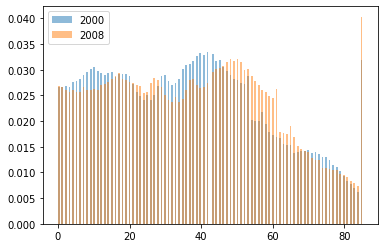

In [106]:
# ohio_df.describe()
plt.hist(ohio_df["age"], bins=len(ohio_df["pop2000"]),weights=ohio_df["pop2000"], density=True, alpha=0.5, label="2000");
plt.hist(ohio_df["age"], bins=len(ohio_df["pop2008"]),weights=ohio_df["pop2008"], density=True, alpha=0.5,label="2008");
plt.legend()


In [127]:
olderThan80 = census_df[census_df['age']>80]
olderThan80.groupby("state").sum().sort_values("pop2000").tail(1)
# olderThan80.groupby("state").sum()




,age,pop2000,pop2008
state,,,
California,830,811312,1085664


In [128]:
olderThan80.groupby("state").sum().sort_values("pop2008").tail(1)







,age,pop2000,pop2008
state,,,
California,830,811312,1085664


#### An Aside on `SELECT`

So far we've been using `SELECT *`. We can also get specific columns by replacing `*` with specific column names.

In [129]:
# Here we'll only get the state names in census_region 2
c.execute('SELECT name FROM state_fact WHERE census_region == 2')

# View as a dataframe sorted alphabetically
pd.DataFrame(c.fetchall(), columns = [x[0] for x in c.description]).sort_values('name')

,name
0,Illinois
8,Indiana
10,Iowa
3,Kansas
5,Michigan
11,Minnesota
6,Missouri
4,Nebraska
1,North Dakota
7,Ohio


In [130]:
# Close the connection because we're done
conn.close()

### Why Would I Ever Do Things the `SQL` Way?

By now you know a lot of `pandas` and probably not so much `SQL`. So why would you ever want to do things the `SQL` way. There are a few reasons.

<ol>
    <li>SQL was made to operate on databases, so it tends to be faster on certain tasks like filtering, selecting and sorting. Check out this nice data incubator blog post <a href="https://blog.thedataincubator.com/2018/05/sqlite-vs-pandas-performance-benchmarks/">https://blog.thedataincubator.com/2018/05/sqlite-vs-pandas-performance-benchmarks/</a>.</li>
    <li>Our databases were quite small so it wasn't a big deal to turn the entire tables into dataframes. However, imagine a customer database for someone like Amazon, or a census database that contains every single census response. It would be unwise to default to storing this data as a pandas dataframe.</li>
    <li>It's better to have two approaches to a problem than just one. So sometimes it's nice to practice the SQL way even if you already have the pandas way.</li>
</ol>

As with most things the approach you take will depend on the use case. When you approach a problem use your best judgement and if you're unsure find someone with more experience and ask for their advice on which approach to use.

## An Intro to `sqlalchemy`

We'll end our notebook with an introduction to a very popular database package, `sqlalchemy`. This package is widely used in industry settings so it's good for you to at least be slightly familiar with it. 

`sqlalchemy` was designed so that you can interact with true `SQL` databases in `python`. For the remainder of this notebook we'll see how we can use it to read in data from a database and then turn it into a `pandas` `DataFrame`. If you'd like to learn more check out the docs, <a href="https://www.sqlalchemy.org/">https://www.sqlalchemy.org/</a>.

Just like with `sqlite3` we'll go step by step.

##### Creating an Engine

In [131]:
# The first step is to create an engine
# The sqlalchemy engine is how we 
# communicate with the database
from sqlalchemy import create_engine

In [132]:
# When we create the engine we have to tell it
# the Dialect, this is the backend language 
# of the database. For us this is SQLite
# We also have to specify a pool, for our purposes
# we can think of this as where our database is stored
engine = create_engine("sqlite:///census.sqlite")

##### Connect to the Database

In [133]:
# next we have to actually connect the engine
# to the database
conn = engine.connect()

##### Execute a Statment Then Fetch

In [134]:
# Just like with sqlite3 we can
# use the connection to execute a query
# and fetch the rows of the data we want

# Unline sqlite3 we need to store the execute
# because it returns a results_proxy object
results_proxy = conn.execute("SELECT * FROM state_fact")

# here the column names are stored in the keys 
# of the results_proxy object
pd.DataFrame(results_proxy.fetchall(),columns = results_proxy.keys()).head()

,id,name,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,13,Illinois,IL,USA,state,10,current,occupied,,17,Ill.,V,2,Midwest,3,East North Central,7
1,30,New Jersey,NJ,USA,state,10,current,occupied,,34,N.J.,II,1,Northeast,2,Mid-Atlantic,3
2,34,North Dakota,ND,USA,state,10,current,occupied,,38,N.D.,VIII,2,Midwest,4,West North Central,8
3,37,Oregon,OR,USA,state,10,current,occupied,,41,Ore.,X,4,West,9,Pacific,9
4,51,Washington DC,DC,USA,capitol,10,current,occupied,,11,,III,3,South,5,South Atlantic,D.C.


##### A Short Cut Using `pandas`

In [135]:
# pandas offers a nice shortcut called read_sql()
# we first input the query statement
# then the engine we want to run it
pd.read_sql("SELECT * FROM state_fact",
               engine).head()

,id,name,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,13,Illinois,IL,USA,state,10,current,occupied,,17,Ill.,V,2,Midwest,3,East North Central,7
1,30,New Jersey,NJ,USA,state,10,current,occupied,,34,N.J.,II,1,Northeast,2,Mid-Atlantic,3
2,34,North Dakota,ND,USA,state,10,current,occupied,,38,N.D.,VIII,2,Midwest,4,West North Central,8
3,37,Oregon,OR,USA,state,10,current,occupied,,41,Ore.,X,4,West,9,Pacific,9
4,51,Washington DC,DC,USA,capitol,10,current,occupied,,11,,III,3,South,5,South Atlantic,D.C.


In [136]:
# The short cut even works with statements that 
# subset the data further
pd.read_sql("SELECT name,abbreviation FROM state_fact WHERE census_region == 2",
               engine)

,name,abbreviation
0,Illinois,IL
1,North Dakota,ND
2,Wisconsin,WI
3,Kansas,KS
4,Nebraska,NE
5,Michigan,MI
6,Missouri,MO
7,Ohio,OH
8,Indiana,IN
9,South Dakota,SD


##### Close the Connection, Dispose the Engine

In [137]:
# When we're done we close the connection
conn.close()

# then dispose the engine
engine.dispose()

### But I Already Knew How To Do This With `sqlite3`!

That might be true, but `sqlite3` is limited to databases where the dialect is `SQLite`. Again this may be sufficient for personal projects, but industries are probably other dialects like PostgreSQL, MySQL, or Oracle for various reasons. These non `SQLite` dialects are supported with `sqlalchemy`, so it's good to have a slight familiarity with it.

### Outside Reading
We've barely scratched `sqalchemy`. I found these two videos from Data Camp to be a good introduction, <a href = "https://www.youtube.com/watch?v=i35OSGXt7wk">https://www.youtube.com/watch?v=i35OSGXt7wk</a>, and <a href="https://www.youtube.com/watch?v=G8zhVGuzdOM">https://www.youtube.com/watch?v=G8zhVGuzdOM</a>. For a deeper dive check out the docs <a href="https://www.sqlalchemy.org/">https://www.sqlalchemy.org/</a>.

## That's it!

For more relational database practice check out the data gathering homework!